In [1]:
# Note: Original saved in Tahir Sproj folder

# Deep Learning Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils import data

# Data Manipulation and Analysis
import numpy as np
# import pandas as pd

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt

# File and System Interaction
import os
from pathlib import Path
import torch.optim as optim


# Date and Time Handling
import time
import datetime

# Neural Architecture
try:
    from torchinfo import summary
except:
    # %pip install torchinfo
    from torchinfo import summary
from scipy.fftpack import dct

In [2]:
%load_ext autoreload
%autoreload 2

from image_py_scripts import dataset_processing # for image inpainting experiment else use python_scripts
from python_scripts import dustmc_training
from python_scripts import logs_and_results
# from python_scripts import img_pdf_compiler
from python_scripts import utils
# from python_scripts import DUST_MC
from python_scripts import dustmc_unrolled
from python_scripts import test
from python_scripts import generate_synthetic_data

In [3]:
# Setting up some global variables

ROOT = os.getcwd().replace('\\', '/') + '/DUSTMC_Data'
# ROOT = 'C:/Users/Talha/OneDrive - Higher Education Commission/Documents/GitHub/ConvHuberMC/HuberMC_Data'
# ROOT = 'C:/Users/HP/GitHub Workspace/ConvHuberMC-Net/HuberMC_Data'
TRY = 'Try 2'
SESSION = 'Session 1'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device, ROOT

('cpu', '/home/nehal/GitHubWorkspace/ConvHuberMC-Net/DUSTMC_Data')

In [13]:
# Get parameters --> for convhubermc:
def get_default_param(gpu = True):
    params_net = {}
    params_net['size1'] = 14
    params_net['size2'] = 28
    params_net['rank'] = 10
    
    params_net['device'] = device
        
    params_net['layers'] = 3
    params_net['CalInGPU'] = gpu
    return params_net

In [14]:
hyper_param_net = dustmc_training.get_hyperparameter_grid('DUSTMC-Net', TrainInstances = 20, ValInstances = 10, BatchSize = 5, 
                                                          ValBatchSize = 2, num_epochs = 1, learning_rate = 0.001,
                                                          K = 5, mu = 0, sigma = 1, m = 14, n = 28, d = 200, T = 28)
params_net = get_default_param(gpu = True)

In [15]:
# Example usage:
model = dustmc_unrolled.DustNet(hyper_param_net)
S = next(iter(train_loader))[0].squeeze()[0]
output = model(S)
print(output)

tensor([[-1.0772e+05, -1.0354e+05, -1.0265e+05, -1.1527e+05, -1.0863e+05,
         -1.0106e+05, -1.0917e+05, -1.1718e+05, -1.1357e+05, -1.0751e+05,
          2.1950e+04,  7.2840e+04,  1.1982e+05,  1.2099e+05,  1.2362e+05,
          1.1034e+05,  9.4272e+04,  1.1016e+05,  8.1087e+04, -8.0795e+04,
         -1.1063e+05, -1.1542e+05, -1.0144e+05, -1.1265e+05, -1.0639e+05,
         -1.1212e+05, -1.0331e+05, -1.0588e+05],
        [-5.8140e+04, -5.3549e+04, -5.9543e+04, -5.9694e+04, -5.4572e+04,
         -5.4535e+04, -6.0996e+04, -6.1454e+04, -5.8699e+04, -5.7695e+04,
          1.1951e+04,  3.5146e+04,  5.8708e+04,  6.2912e+04,  6.4516e+04,
          6.1002e+04,  5.3581e+04,  6.4331e+04,  4.1898e+04, -4.3607e+04,
         -5.9689e+04, -6.0067e+04, -5.7371e+04, -6.2300e+04, -5.7054e+04,
         -6.1954e+04, -5.2165e+04, -5.8529e+04],
        [-9.3358e+04, -8.9835e+04, -8.9724e+04, -9.8218e+04, -9.6435e+04,
         -8.8508e+04, -1.0044e+05, -1.0370e+05, -9.7781e+04, -9.4811e+04,
          1.90

In [57]:
summary(model, input_size = [hyper_param_net['n'], hyper_param_net['T']])

Layer (type:depth-idx)                   Output Shape              Param #
DustNet                                  [28, 28]                  6,386
├─ModuleList: 1-1                        --                        --
│    └─BlueBoxLayer: 2-1                 [200, 28]                 --
│    │    └─SelfAttention: 3-1           [200, 28]                 --
│    │    └─LISTA: 3-2                   [200, 28]                 45,601
│    └─BlueBoxLayer: 2-2                 [200, 28]                 --
│    │    └─SelfAttention: 3-3           [200, 28]                 --
│    │    └─LISTA: 3-4                   [200, 28]                 45,601
│    └─BlueBoxLayer: 2-3                 [200, 28]                 --
│    │    └─SelfAttention: 3-5           [200, 28]                 --
│    │    └─LISTA: 3-6                   [200, 28]                 45,601
│    └─BlueBoxLayer: 2-4                 [200, 28]                 --
│    │    └─SelfAttention: 3-7           [200, 28]                 --


In [19]:
# MNIST DATA TESTING
import torchvision
from torchvision import datasets, transforms

# download and transform train dataset
train_loader = data.DataLoader(datasets.MNIST('../mnist_data', 
                               download=True, 
                               train=True,
                               transform=transforms.Compose([
                                   transforms.ToTensor(), # first, convert image to PyTorch tensor
                                   transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                               ])), 
                               batch_size=5, 
                               shuffle=True)

# download and transform test dataset
val_loader = data.DataLoader(datasets.MNIST('../mnist_data', 
                             download=True, 
                             train=False,
                             transform=transforms.Compose([
                                 transforms.ToTensor(), # first, convert image to PyTorch tensor
                                 transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                             ])), 
                             batch_size=2, 
                             shuffle=True)

Project Name: Try 2 DUSTMC-Net mu 20.0% sigma 3.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 14, 'size2': 28, 'rank': 10, 'device': 'cpu', 'layers': 3, 'CalInGPU': True}

Epoch: 1, 2024-08-14 01:00:53, 

Epoch [1/20], Mean Training Loss:1.13107e+11, Mean Validation Loss:1.64634e+10
Epoch: 2, 2024-08-14 01:02:24, 

Epoch [2/20], Mean Training Loss:1.84086e+10, Mean Validation Loss:3.16716e+09
Epoch: 3, 2024-08-14 01:04:09, 

Epoch [3/20], Mean Training Loss:3.90697e+09, Mean Validation Loss:6.35721e+08
Epoch: 4, 2024-08-14 01:05:59, 

Epoch [4/20], Mean Training Loss:8.76200e+08, Mean Validation Loss:1.99538e+08
Epoch: 5, 2024-08-14 01:07:51, 

Epoch [5/20], Mean Training Loss:3.93770e+08, Mean Validation Loss:1.35304e+08
Saving Whole Model at Epochs: [5/20]
Saving Model Dict at Epochs: [5/20]
Epoch: 6, 2024-08-14 01:09:40, 

Epoch [6/20], Mean Training Loss:3.18672e+08, Mean Validation Loss:1.25859e+08
Epoch: 7, 2024-08-14 01:11:28, 



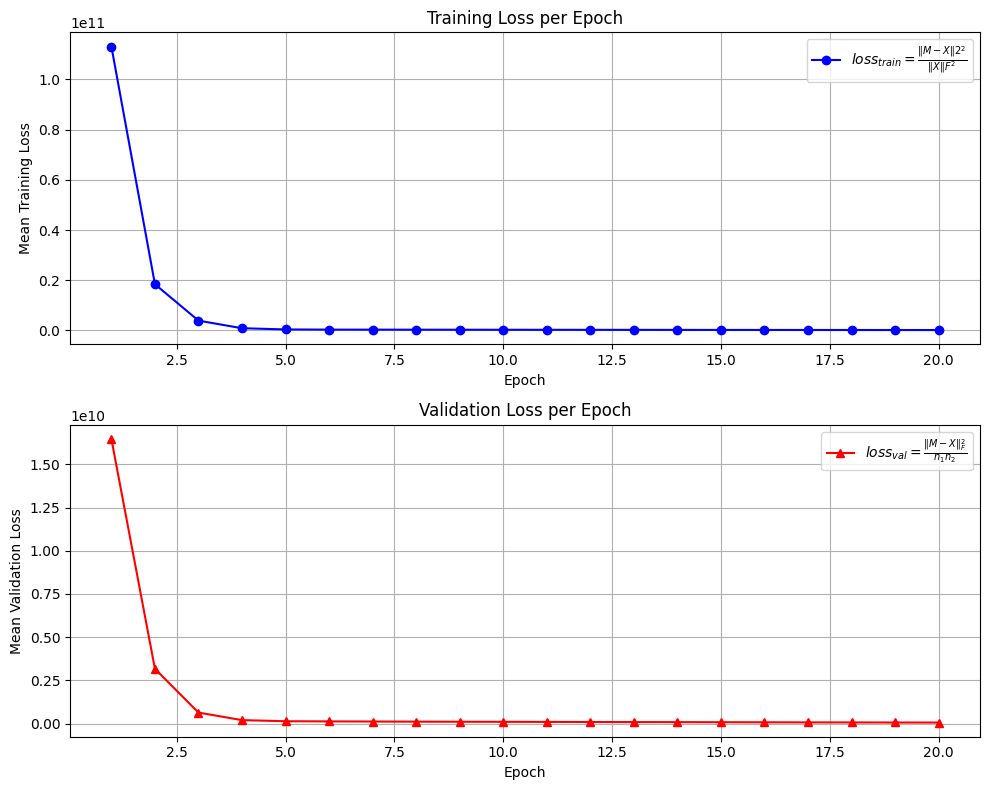

In [26]:
# Some settings for visualisation
matplotlib.use('Agg')
%matplotlib inline

seed = 123
torch.manual_seed(seed)

# Set parameters (including hyperparameters) and setting for saving/logging data
hyper_param_net = dustmc_training.get_hyperparameter_grid('DUSTMC-Net', TrainInstances = 20, ValInstances = 10, BatchSize = 5, 
                                                          ValBatchSize = 2, num_epochs = 20, learning_rate = 0.001,
                                                          K = 5, mu = 0, sigma = 1, m = 14, n = 28, d = 200, T = 28)
params_net = get_default_param(gpu = True)
CalInGPU = params_net['CalInGPU']

mu_list = [0.2]#, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
sigma_list = [3.0]#, 5.0, 6.0, 9.0]

for mu in mu_list:
    for sigma in sigma_list:
        # ProjectName = TRY + ' ' + logs_and_results.get_current_time() + ' ' + hyper_param_net['Model'] + ' ' + 'Sampling Rate: ' + logs_and_results.get_q_str(q) + ' and DB ' + logs_and_results.get_noise_str(db)

        ProjectName = TRY + ' ' + hyper_param_net['Model'] + ' mu ' + logs_and_results.get_q_str(mu) + ' sigma ' + logs_and_results.get_noise_str(sigma)
        # Note: Removed time stamp from log file name as : not supported. Weird because this was not a problem in linux

        # Get log file
        logfile = logs_and_results.get_modularized_record(ProjectName, mu, sigma, 'Logs', hyper_param_net, params_net, ROOT, SESSION)
        with open(logfile, 'w', 1) as log:
            print('Project Name: %s\n'%ProjectName)
            log.write('Project Name: %s\n\n'%ProjectName)

            # Get Model
            net = dustmc_training.get_model(params_net, hyper_param_net, log)
            print('\nParameters = \n%s\n'%str(params_net))
            log.write('\nParameters = \n%s\n\n'%str(params_net))

            #Loading data and creating dataloader for both test and training
            # print('Loading Data phase...')
            log.write('Loading phase...\n')
            shape_dset = (params_net['size1'], params_net['size2'])
            
            # train_loader, val_loader = dataset_processing.get_dataloaders(params_net = params_net, hyper_param_net = hyper_param_net, sampling_rate = 0.5, db = 3.0, ROOT = ROOT, synthetic = False)

            # print('Finished loading.\n')
            log.write('Finished loading.\n\n')

            # Some additional settings for training including loss, optimizer,
            # floss = nn.functional.mse_loss(reduction = 'sum')
            floss = nn.MSELoss()
            optimizer = torch.optim.Adam(net.parameters(), lr = hyper_param_net['Lr'])
            # scheduler2 =  torch.optim.lr_scheduler.StepLR(optimizer, step_size= 1, gamma = 0.97, verbose = True)

            # Array for recording parameter values after each layer for each epoch etc
            outputs_L = dustmc_unrolled.to_var(torch.zeros([shape_dset[0], shape_dset[1]]), CalInGPU) 
            lossmean_vec = np.zeros((hyper_param_net['Epochs'], ))
            lossmean_val_vec = np.zeros((hyper_param_net['Epochs'], ))


            # dummy variable to monitor and record progress for loss
            minloss = np.inf

            for epoch in range(hyper_param_net['Epochs']):
                print(f'Epoch: {epoch + 1}, {logs_and_results.get_current_time()}, \n')
                log.write(f'Epoch: {epoch + 1} ')
                log.write(logs_and_results.get_current_time() + '\n\n')

                # Train and Test Steps. (Record every 5 epochs)
                if (epoch + 1) % 5 == 0:
                    # print('Loading and calculating training batches...')
                    log.write('Loading and calculating training batches...\n')
                    startime = time.time()
                    loss_mean = dustmc_training.train_step(net, train_loader, floss, optimizer, hyper_param_net['TrainInstances'], hyper_param_net['BatchSize']) # remove alpha from train func
                    endtime = time.time()
                    # print('Training time is %f'%(endtime - startime))
                    log.write('Training time is %f'%(endtime - startime))

                    # print('Loading and calculating validation batches...')
                    log.write('Loading and calculating validation batches...\n')
                    startime = time.time()
                    loss_val_mean = dustmc_training.test_step(net, val_loader, floss, hyper_param_net['ValInstances'], hyper_param_net['ValBatchSize'])
                    endtime = time.time()
                    # print('Test time is %f'%(endtime - startime))
                    log.write('Test time is %f'%(endtime - startime))

                else:
                    loss_mean = dustmc_training.train_step(net, train_loader, floss, optimizer, hyper_param_net['TrainInstances'], hyper_param_net['BatchSize'])
                    loss_val_mean = dustmc_training.test_step(net, val_loader, floss, hyper_param_net['ValInstances'], hyper_param_net['ValBatchSize'])

                # Update Record and Parameters
                lossmean_vec[epoch] = loss_mean
                lossmean_val_vec[epoch] = loss_val_mean


                print('Epoch [%d/%d], Mean Training Loss:%.5e, Mean Validation Loss:%.5e'
                      %(epoch + 1, hyper_param_net['Epochs'], loss_mean, loss_val_mean))

                # Update Log after every 5 epochs. Make a plot of MSE against epochs every 5 epochs. Save Model in whole/dict form every five epochs.
                if (epoch + 1) % 5 == 0:
                    print(f"Saving Whole Model at Epochs: [{epoch + 1}/{hyper_param_net['Epochs']}]")
                    model_whole_path = logs_and_results.get_modularized_record(ProjectName, mu, sigma, 'Saved Models - Whole', hyper_param_net, params_net, ROOT, SESSION, current_epoch = epoch + 1)
                    # torch.save(net, model_whole_path)
                    print(f"Saving Model Dict at Epochs: [{epoch + 1}/{hyper_param_net['Epochs']}]")
                    model_state_dict_path = logs_and_results.get_modularized_record(ProjectName, mu, sigma, 'Saved Models - Dict', hyper_param_net, params_net, ROOT, SESSION, current_epoch = epoch + 1)
                    # torch.save(net.state_dict(), model_state_dict_path)

                    log.write('Epoch [%d/%d], Mean Training Loss:%.5e, Mean Validation Loss:%.5e\n'
                              %(epoch + 1, hyper_param_net['Epochs'], loss_mean, loss_val_mean))
                    np.set_printoptions(precision = 3)

                    if True or loss_val_mean < minloss:
                        # print('saved at [epoch%d/%d]'%(epoch + 1, hyper_param_net['Epochs']))
                        log.write('saved at [epoch%d/%d]\n' %(epoch + 1, hyper_param_net['Epochs']))
                        minloss = min(loss_val_mean, minloss)

            # Finish off by observing the minimum loss on validation set

            # Print min loss
            # print('\nMin Loss = %.4e'%np.min(lossmean_val_vec))
            log.write('\nMin Loss = %.4e'%np.min(lossmean_val_vec))

            # Plotting MSE vs Epoch and Saving it
                                                           
            # Get Directory where we have to save the plot
            dir = logs_and_results.get_modularized_record(ProjectName, mu, sigma, 'Plots', hyper_param_net, params_net, ROOT, SESSION, current_epoch = epoch + 1)
            logs_and_results.plot_and_save_mse_vs_epoch(lossmean_vec, lossmean_val_vec, dir)

In [14]:
S = np.load('C:/Users/Talha/OneDrive - Higher Education Commission/Documents/GitHub/ConvHuberMC/Image_Inpainting_Data/BSDS300/images/train/groundtruth/ground_image_MC_train_0.npy')
S = torch.tensor(S, dtype=torch.float32)
S

tensor([[0.4432, 0.4606, 0.4619,  ..., 0.3786, 0.4046, 0.4038],
        [0.4304, 0.4273, 0.3964,  ..., 0.6146, 0.5695, 0.5617],
        [0.5911, 0.6706, 0.6233,  ..., 0.6153, 0.6450, 0.6677],
        ...,
        [0.3389, 0.3429, 0.3490,  ..., 0.3370, 0.3325, 0.3336],
        [0.3448, 0.3605, 0.3729,  ..., 0.3534, 0.3495, 0.3466],
        [0.3497, 0.3455, 0.3385,  ..., 0.3705, 0.3588, 0.3548]])

In [18]:
mse = torch.mean((S - output) ** 2)

print("Mean Squared Error:", mse.item())

Mean Squared Error: 2774041.5


In [17]:
utils.columnwise_mse_loss(S, output)

tensor(4.1611e+08, grad_fn=<DivBackward0>)

In [15]:

output = net(S)
print(f'output: {output}')

temp: tensor([[ 1.1350,  0.8023,  0.3308,  ...,  1.9147,  1.7229,  1.3163],
        [-1.4841, -1.7648, -1.7976,  ..., -2.1163, -2.6735, -2.7756],
        [-4.1869, -3.9287, -3.6985,  ..., -1.4537, -1.1150, -0.8700],
        ...,
        [ 2.0350,  2.1425,  2.0312,  ...,  1.5829,  1.6479,  1.8808],
        [ 2.0577,  1.2997,  1.3398,  ...,  2.2412,  1.9779,  1.9312],
        [-1.6111, -2.0963, -2.2349,  ..., -1.3355, -1.8247, -1.8524]],
       grad_fn=<MmBackward0>)
E: tensor([[ 2.0221,  0.0049,  1.1193,  ..., -0.3558, -0.3642,  0.1443],
        [-0.8113, -0.2764,  1.3450,  ..., -1.0165,  1.1579, -0.3202],
        [ 0.4920,  0.7076, -0.5155,  ..., -0.1141,  0.8784, -1.5765],
        ...,
        [ 0.5856,  0.0405, -0.6492,  ..., -0.6636, -1.1359, -0.1756],
        [ 0.2147,  0.1408,  0.7926,  ...,  0.1794,  1.5635,  0.8383],
        [ 0.2599, -0.1073,  0.1905,  ..., -0.8597,  1.9708,  0.7392]])
X: tensor([[ 3.1571,  0.8073,  1.4501,  ...,  1.5589,  1.3587,  1.4607],
        [-2.2954, -2

In [19]:
DD = net.D
D_np = DD.detach().numpy()
D_np

array([[-2.565e-01, -1.020e+00,  1.503e-01, ...,  5.328e-01,  2.564e-01,
         1.049e+00],
       [-2.884e-01,  1.066e+00,  3.252e-01, ..., -1.651e+00, -1.886e-01,
        -6.238e-01],
       [-1.437e+00, -1.884e-01, -7.353e-02, ..., -1.003e+00, -1.079e-01,
        -1.762e-01],
       ...,
       [ 1.227e-01,  9.139e-01, -4.650e-01, ...,  4.754e-01,  1.023e+00,
         6.615e-01],
       [-9.126e-01,  5.189e-01, -3.611e-01, ...,  3.564e-01,  2.298e-01,
        -1.139e-03],
       [ 1.555e-01, -4.967e-01,  2.672e+00, ...,  1.067e+00,  4.170e-01,
        -3.889e-01]], dtype=float32)

In [29]:
def visualize_dct(d):
    d = d + abs(d.min())
    h = np.histogram(d, bins=1000, range=(0, d.max()))
    c = 255.0*np.cumsum(h[0])/sum(h[0])
    new_img = np.zeros(d.shape)
    for index,value in np.ndenumerate( d ):
        new_img[index] = c[999.0*value/d.max()]    
    return new_img

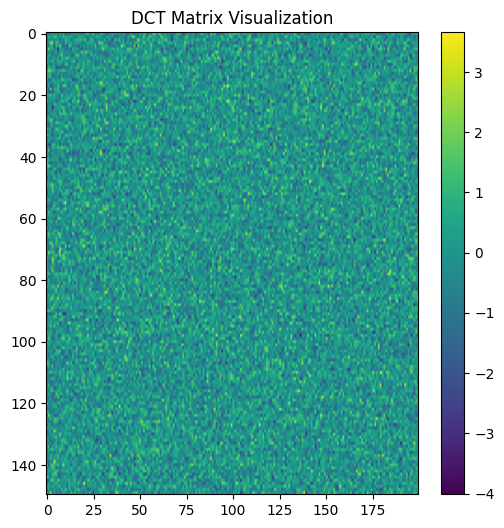

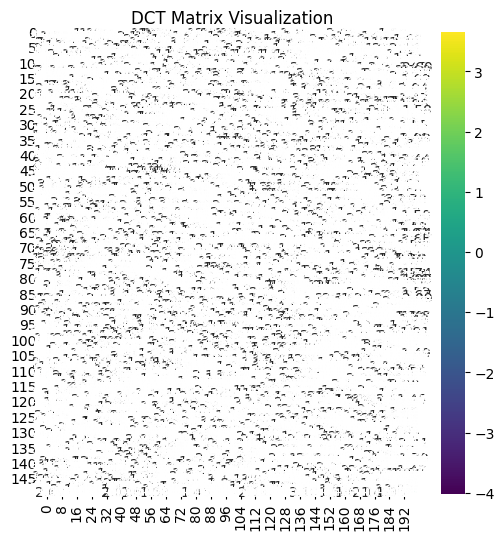

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Option 1: Using imshow
plt.figure(figsize=(6, 6))
plt.imshow(D_np, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("DCT Matrix Visualization")
plt.show()

# Option 2: Using seaborn's heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(D_np, annot=True, fmt=".2f", cmap='viridis')
plt.title("DCT Matrix Visualization")
plt.show()

In [10]:
import torch

# Example values
DH = torch.randn(10, 5)  # Shape (n, T)

# Compute βi values
beta_i = torch.exp(-0.5 * torch.sum(DH ** 2, dim=0))  # Shape (T,)

# Ensure indexing returns a tensor
index = 2
indexed_value = beta_i[index]

print(f"beta_i: {beta_i}")
print(f"Indexed value: {indexed_value}")
print(f"Type of indexed value: {type(indexed_value)}")  # Should be <class 'torch.Tensor'>


beta_i: tensor([0.0221, 0.0345, 0.0003, 0.0150, 0.0002])
Indexed value: 0.0003437580307945609
Type of indexed value: <class 'torch.Tensor'>


In [11]:
# Get relevant arguements for DUSTMC

M_train, M_Omega_train, M_test, M_Omega_test = generate_synthetic_data.generate_simple_gaussian_noise(150, 300, 10, 10, 2, 0.5, 3)

In [12]:
# Set the random seed for reproducibility
# np.random.seed(42)

rand_batch_idx = np.random.randint(0, M_Omega_train.shape[0])
X = M_Omega_train[rand_batch_idx, :, :]

# Initialize a m x n A measurement sensing matrix with random values from a uniform distribution between 0 and 1
A = np.random.uniform(0, 1, (100, 150)) # A is m x n. Since m << n and n is normally 150

# Initalize the Dictonary D which is n x d and d >> n by DCT. d is taken as 512
random_matrix = np.random.uniform(0, 1, (150, 512))

# Apply the Discrete Cosine Transform (DCT) to the matrix
D = dct(random_matrix, type = 2, norm = 'ortho')

# Initialize K (no. of iterations), and hyperparameters lambda_1, lambda_2, and c
K = 50
lambda_1 = 0.1
lambda_2 = 0.4
c = 1

In [13]:
# Now run the attention based algo on X to get its recovered/reconstructed form S
S = test.attention_based_algo(A, D, X, K, lambda_1, lambda_2, c)

/home/nehal/GitHubWorkspace/ConvHuberMC-Net/python_scripts/test.py:49: RuntimeWarning: overflow encountered in exp
  exp_values = np.exp(exponent_terms)
/home/nehal/GitHubWorkspace/ConvHuberMC-Net/python_scripts/test.py:52: RuntimeWarning: invalid value encountered in multiply
  G_numerator = np.sum(beta_values[:, None] * exp_values[:, None] * H.T, axis=0)
/home/nehal/GitHubWorkspace/ConvHuberMC-Net/python_scripts/test.py:53: RuntimeWarning: invalid value encountered in multiply
  G_denominator = np.sum(beta_values * exp_values)


In [14]:
# Now measure loss between reconstructed and groundtruth

groundtruth = M_train[rand_batch_idx, :, :]

print(f'The squared L2 norm loss is: {utils.compute_squared_l2_norm_loss(S, groundtruth)}')

The squared L2 norm loss is: nan
